In [40]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime

In [41]:
df = pd.read_csv('offline_LSC_2024_mean.csv')

In [42]:
df["TS"] = pd.to_datetime(df["TS"], format='%Y-%m-%d %H:%M:%S')
df.set_index('TS', inplace=True)


In [43]:
df_mu = pd.read_csv('mu_plume.csv')

In [44]:
df_mu["TS"] = pd.to_datetime(df_mu["TS"], format='%Y.%m.%d %H:%M:%S.%f')
df_mu["TS"] = df_mu['TS'] - pd.Timedelta('2 hours')

df_mu.set_index('TS', inplace=True)

In [45]:
df = pd.merge_asof(df_mu,df,left_index=True,right_index=True,direction='nearest')

In [46]:
df['x_estimate'] = df['x_estimate']/df['mu']
df['y_estimate'] = df['y_estimate']/df['mu']


In [18]:
df_x_position = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_minivdm_2024/input_data/beamline/output_PosX.csv')
df_y_position = pd.read_csv('/Users/zenith378/Documents/Uni/Tesi/beamline_lumi_clustering/data_minivdm_2024/input_data/beamline/output_PosY.csv')
df_x_position["TS"] = pd.to_datetime(df_x_position["TS"], format='%d-%m-%Y %H:%M:%S.%f')
df_x_position.set_index('TS', inplace=True)
df_y_position["TS"] = pd.to_datetime(df_y_position["TS"], format='%d-%m-%Y %H:%M:%S.%f')

df_y_position.set_index('TS', inplace=True)


In [19]:
df_x_position = df_x_position[' VALUE']/0.03276+0.004413/0.03276 #df["x_estimate"]
df_y_position = df_y_position[' VALUE']/0.00359+0.11#-0.1866/0.359+0.75#df["y_estimate"]

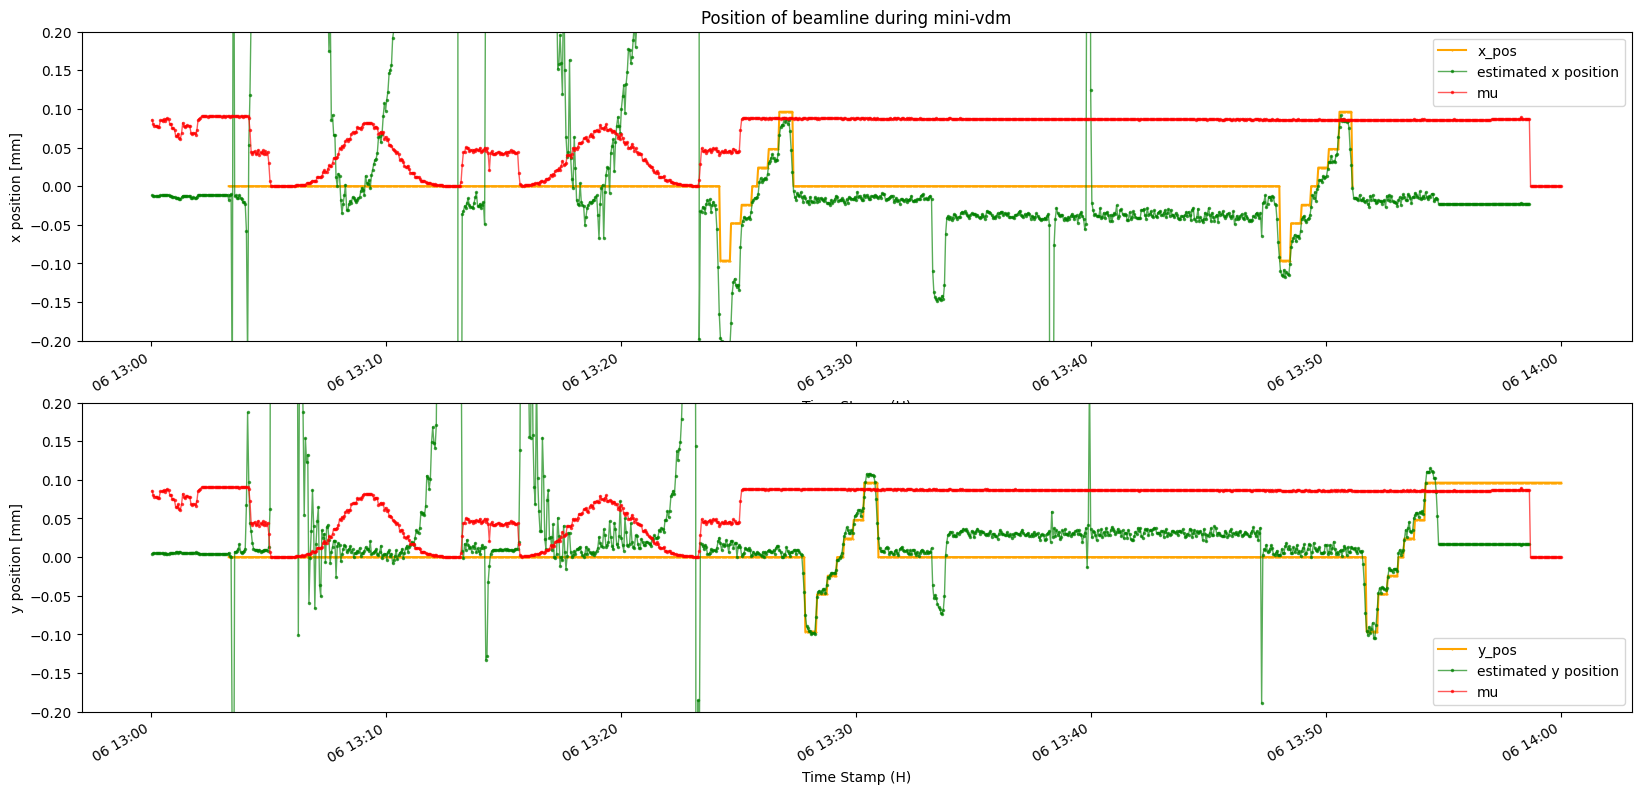

In [49]:
_, axes = plt.subplots(nrows=2, ncols=1, sharex=False, figsize=(20, 10))


df_x1_position = df["x_pos"]
df_y2_position = df["y_pos"]
df_x_position = df['x_estimate']*9
df_y_position = df['y_estimate']*9

df_mu_display = df_mu["mu"]*0.01
#shift the index of df_y_position 1 hour backwards
#df_y_position.index = df_y_position.index - pd.DateOffset(hours=1)
'''
ax1 = df_position.plot(
        marker=".",
        markersize=1,
        title="",
        xlabel="Time Stamp (H:m)",
        ylabel="luminosity",
        ax=axes[0],
        ylim=[-0.15,0.15]

    )
'''
ax2 = df_x1_position.between_time("13:00","14:00").plot(
        ax=axes[0],
        marker=".",
        markersize=1,
        linestyle="solid",
        ylabel="x position [mm]",
        title="Position of beamline during mini-vdm",
        color="orange",
        ylim=[-.2,.2],
    )


ax6 = df_x_position.between_time("13:00","14:00").plot(
        ax=axes[0],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.65,
        linewidth=1,
        label="estimated x position",
        xlabel="Time Stamp (H)",
        #ylim=[-0.2,0.2],
        color="green",
        ylim=[-.2,.2],)


ax4 = df_mu_display.between_time("13:00","14:00").plot(
    ax=axes[0],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.65,
        linewidth=1,
        label="mu",
        xlabel="Time Stamp (H)",
        #ylim=[-0.2,0.2],
        color="red",
        ylim=[-.2,.2],
)

ax5 = df_y2_position.between_time("13:00","14:00").plot(
        ax=axes[1],
        marker=".",
        markersize=1,
        linestyle="solid",
        xlabel="Time Stamp (H)",
        ylabel="y position [mm]",
        color="orange",
        ylim=[-.2,.2],
    )



ax7 = df_y_position.between_time("13:00","14:00").plot(
        ax=axes[1],
        marker=".",
        markersize=3,
        linestyle="solid",
        linewidth=1,
        alpha=0.65,
        xlabel="Time Stamp (D H:m)",
        label="estimated y position",
        ylim=[-.2,.2],
        color="green",
        #ylim=[-0.02,0.02]
    )


ax9 = df_mu_display.between_time("13:00","14:00").plot(
    ax=axes[1],
        marker=".",
        markersize=3,
        linestyle="solid",
        alpha=0.65,
        linewidth=1,
        label="mu",
        xlabel="Time Stamp (H)",
        ylim=[-0.2,0.2],
        color="red"
)



#ax1.legend(prop={"size": 0}, ncols=10)

ax2.legend(prop={"size": 10})
ax9.legend(prop={"size": 10})
ax5.legend(prop={"size": 10})
ax4.legend(prop={"size": 10})

#plt.ylim(-0.2,0.2)
plt.show()